In [45]:
from pyproj import CRS
from pyproj import Proj
from pyproj import Transformer
# from pyproj import transform
import os
import xarray as xr
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import rioxarray

In [46]:
filedir = '/share/goes-ir-bucket-images'
filename = 'OR_ABI-L1b-RadF-M6C12_G16_s20210232310195_e20210232319509_c20210232319584.nc'
filepath = os.path.join(filedir, filename)
f = Dataset(filepath, mode='r')

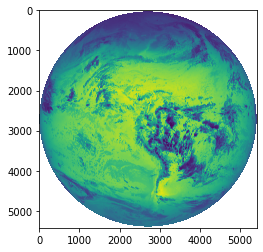

In [47]:
variable = 'Rad'
data = f.variables[variable][:]
longname = f.variables[variable].long_name
units = f.variables[variable].units
plt.imshow(data)

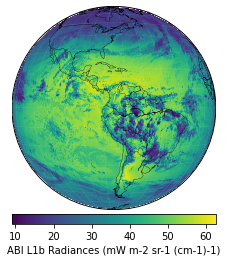

In [48]:
bmap = Basemap(projection='geos', lon_0=-75.2, lat_0=0, satellite_height=35786023.0, ellps='GRS80')
bmap.imshow(data, origin='upper')
bmap.drawcoastlines(linewidth=0.3, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.3, linestyle='solid', color='black')
bmap.drawparallels(np.arange(-90.0, 90.0, 10.0), linewidth=0.1, color='white')
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.1, color='white')
bmap.colorbar(location='bottom', label=f'{longname} ({units})')

In [49]:
f['geospatial_lat_lon_extent']

<class 'netCDF4._netCDF4.Variable'>
float32 geospatial_lat_lon_extent()
    long_name: geospatial latitude and longitude references
    geospatial_westbound_longitude: -156.2995
    geospatial_northbound_latitude: 81.3282
    geospatial_eastbound_longitude: 6.2995
    geospatial_southbound_latitude: -81.3282
    geospatial_lat_center: 0.0
    geospatial_lon_center: -75.0
    geospatial_lat_nadir: 0.0
    geospatial_lon_nadir: -75.0
    geospatial_lat_units: degrees_north
    geospatial_lon_units: degrees_east
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [50]:
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: WCDAS
    production_environment: OE
    spatial_resolution: 2km at nadir
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM1
    title: ABI L1b Radiances
    summary: Single emissive band ABI L1b Radiance Products are digital maps of outgoing radiance values at the top of the atmosphere for IR bands.
    keywords: SPECTRAL/ENGINEERING > INFRARED WAVELENGTHS > INFRARED RADIANCE
    keywords_vocabul

In [51]:
f['goes_imager_projection']

<class 'netCDF4._netCDF4.Variable'>
int32 goes_imager_projection()
    long_name: GOES-R ABI fixed grid projection
    grid_mapping_name: geostationary
    perspective_point_height: 35786023.0
    semi_major_axis: 6378137.0
    semi_minor_axis: 6356752.31414
    inverse_flattening: 298.2572221
    latitude_of_projection_origin: 0.0
    longitude_of_projection_origin: -75.0
    sweep_angle_axis: x
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used

In [79]:
f['goes_imager_projection'].perspective_point_height

35786023.0

In [80]:
inproj = Proj('+proj=geos +h=35786023.0 +lon_0=-75 +sweep=x') 
outproj = Proj('epsg:4326')

x = np.array(file['x'][:])
y = np.array(file['y'][:])


In [81]:
intrans = Transformer.from_proj(inproj, outproj)

In [82]:
lats, lons = intrans.transform(x,y)
lat, lon = transform(inproj, outproj, x, y)

In [83]:
print(lats)
print(lat)

[ 1.37323074e-06  1.37272431e-06  1.37221787e-06 ... -1.37221787e-06
 -1.37272431e-06 -1.37323074e-06]
[ 1.37323074e-06  1.37272431e-06  1.37221787e-06 ... -1.37221787e-06
 -1.37272431e-06 -1.37323074e-06]


In [84]:
derpx = abs(lats - lat)
derpx.max()

0.0

In [85]:
derpy = abs(lons - lon)
derpy.max()

0.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


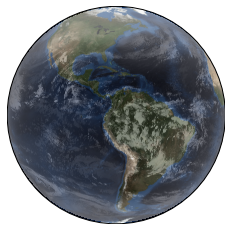

In [86]:
bmap.bluemarble()
bmap.imshow(data, origin='upper', cmap='Greys', alpha=0.5)

In [87]:
lons.min()

-75.00000136403783

In [89]:
lons.max()

-74.99999863596219

In [90]:
lats.min()

-1.3732307422105372e-06

In [91]:
lats.max()

1.3732307422105372e-06